In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
import scipy.stats
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 2})

In [3]:
# I forgot to save p_elim_dep for each run. Extract it from file name
data = np.load("C:/Work/phd/simulation_statistics/batch_analysis_122835_27122017.npz")
metadata = np.load("C:/Work/phd/simulation_statistics/batch_c78dc3e4b8b488d527d6f8ef1554af00.npz")
print data['recording_archive_name']
print 'Total time taken for simulations:', metadata['total_time']

../synaptogenesis/c78dc3e4b8b488d527d6f8ef1554af00/case3_b1.4_gaussianinput1_tau_minus90_pelimdep0.0445_@c78dc3e4b8b488d527d6f8ef1554af00.npz
Total time taken for simulations: 3 days, 0:25:29.130440


In [4]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)
# p_elim_deps = np.array(data['results'][:, -1]) # here map(split('@')[0][-5:-1] or something

parameters_of_interest = metadata['parameters_of_interest']
# parameters_of_interest = np.append(metadata['parameters_of_interest'], 'p_elim_dep')

In [5]:
metadata['parameters_of_interest']

array(['case', 'b', 'gaussian_input', 'tau_minus', 'p_elim_dep'],
      dtype='|S14')

In [6]:
parameters_of_interest[3] = 't_minus'

In [7]:
bs = np.asarray([1.4, 1.3, 1.2, 1.1, 1.0])
gaussian_inputs = np.asarray([0, 1])
tau_minuss = np.asarray([10, 30, 60, 90])
p_elim_deps = np.asarray([0.0145, 0.0245, 0.0345, 0.0445])

In [8]:
parameters_of_interest

array(['case', 'b', 'gaussian_input', 't_minus', 'p_elim_dep'],
      dtype='|S14')

In [9]:
params.shape

(478L, 2L)

In [10]:
all_names = np.asarray(results.dtype.names)

In [11]:
results.dtype.names

('rate',
 'number_ff_synapses',
 'final_weight_proportion',
 'init_mean_std',
 'fin_mean_std_conn_shuf',
 'fin_mean_std_conn',
 'wsr_sigma_fin_conn_fin_conn_shuffle',
 'fin_mean_std_weight_shuf',
 'fin_mean_std_weight',
 'wsr_sigma_fin_weight_fin_weight_shuffle',
 'init_mean_AD',
 'fin_mean_AD_conn_shuf',
 'fin_mean_AD_conn',
 'wsr_AD_fin_conn_fin_conn_shuffle',
 'fin_mean_AD_weight_shuf',
 'fin_mean_AD_weight',
 'wsr_AD_fin_weight_fin_weight_shuffle')

In [12]:
interesting_names = all_names[np.where(['init' not in name and 'wsr' not in name for name in all_names])]
interesting_names_indices = np.where(['init' not in name and 'wsr' not in name for name in all_names])[0]
print interesting_names
print interesting_names.shape
print [interesting_names[0]]
print results[interesting_names[0]].shape
print results['rate'].shape
print results['rate'].size

['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']
(11L,)
['rate']
(478L, 17L)
(478L, 17L)
8126


In [13]:
# Database queries

def search(database=results, **kwargs_filters):
    print kwargs_filters
    if kwargs_filters == {}:
        return database
    
    filter_application = []
    
    for key in kwargs_filters.keys():
        filter_application.append(np.where(database[key]==kwargs_filters[key]))
#     return filter_application

    
    
    return database[filter_application]



In [14]:
search(rate=0).shape

{'rate': 0}


(2L, 0L, 17L)

In [15]:
# plot b vs 

In [16]:
correlation = scipy.stats.spearmanr(results[:, interesting_names_indices])

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
 [py.warnings]
  "values. nan values will be ignored.", RuntimeWarning)



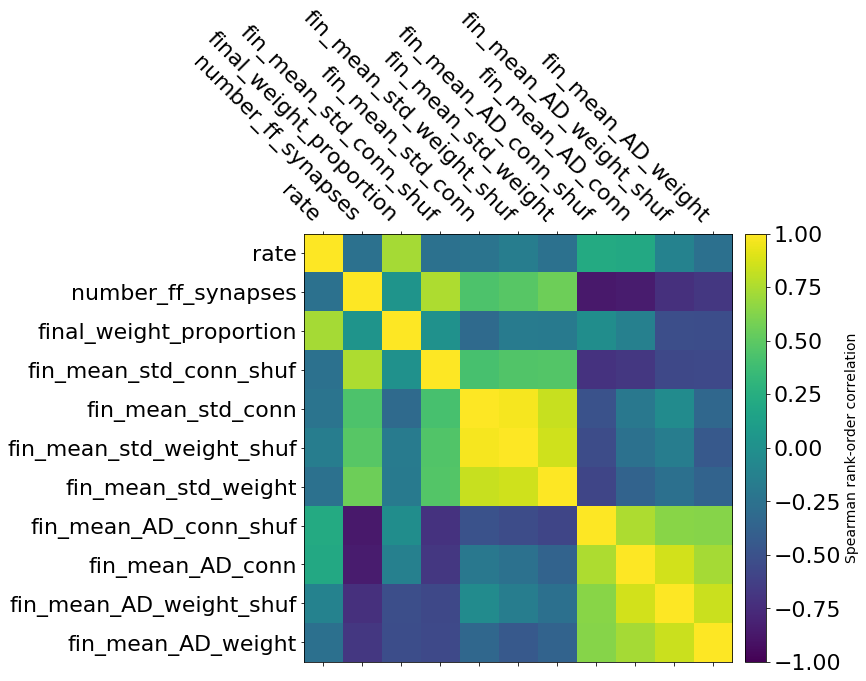

In [17]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(interesting_names.size))
ax1.set_xticklabels(interesting_names, rotation='-45', ha='right')
ax1.set_yticks(range(interesting_names.size))
ax1.set_yticklabels(interesting_names, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
f.savefig('result_matrix_correlations.png')

In [18]:
# Fine, but how do my parameters covary with all of the results?
# append these parameters of interest to the results matrix(?)
parameters_of_interest

array(['case', 'b', 'gaussian_input', 't_minus', 'p_elim_dep'],
      dtype='|S14')

In [19]:
params[:,1].size

478

In [20]:
params_of_interest = parameters_of_interest
set_of_poi = np.ones((results.shape[0], len(params_of_interest))) * np.nan
for index, param_set in np.ndenumerate(params[:,0]):
    for poi in range(len(params_of_interest)):
        set_of_poi[index[0], poi] = param_set[params_of_interest[poi]]

In [21]:
for poi in range(len(params_of_interest)):
    print params_of_interest[poi]

case
b
gaussian_input
t_minus
p_elim_dep


In [22]:
results_with_poi = np.concatenate((np.asarray(results[:, interesting_names_indices], dtype=float), set_of_poi), axis=1)

In [23]:
correlation_with_poi = scipy.stats.spearmanr(results_with_poi)

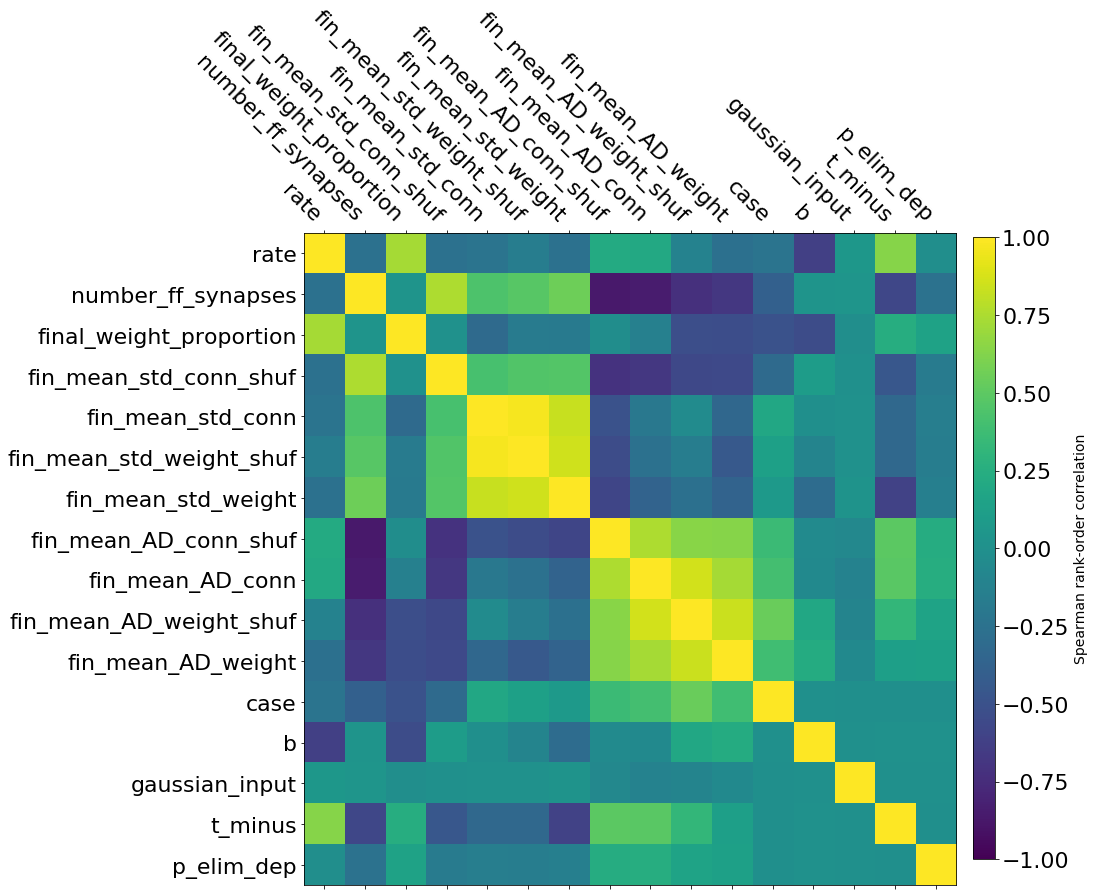

In [24]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation_with_poi.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(results_with_poi.shape[1]))
ax1.set_xticklabels(interesting_names.tolist() + params_of_interest.tolist(), rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi.shape[1]))
ax1.set_yticklabels(interesting_names.tolist() + params_of_interest.tolist(), ha='right')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
f.savefig('result_matrix_w_params_correlations.png')

In [25]:
set_of_poi

array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   1.45000000e-02],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   2.45000000e-02],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   3.45000000e-02],
       ..., 
       [  3.00000000e+00,   1.40000000e+00,   1.00000000e+00,
          9.00000000e+01,   2.45000000e-02],
       [  3.00000000e+00,   1.40000000e+00,   1.00000000e+00,
          9.00000000e+01,   3.45000000e-02],
       [  3.00000000e+00,   1.40000000e+00,   1.00000000e+00,
          9.00000000e+01,   4.45000000e-02]])

In [26]:
# Display 2 correlation matrices side by side for t_minus = 10 and for t_minus = 100

interesting_names_2 = all_names[np.where(['init' not in name and 'wsr' not in name and 'shuf' not in name for name in all_names])]
interesting_names_indices_2 = np.where(['init' not in name and 'wsr' not in name and 'shuf' not in name for name in all_names])[0]

results_with_poi_2 = np.concatenate((np.asarray(results[:, interesting_names_indices_2], dtype=float), set_of_poi), axis=1)

correlation_with_poi_gi_case_1 = scipy.stats.spearmanr(results_with_poi_2[np.logical_and(results_with_poi_2[:,-3]==1, results_with_poi_2[:,-5]==1)][:,:-1])
# correlation_with_poi_t_minus_100 = scipy.stats.spearmanr(results_with_poi_2[results_with_poi_2[:,-1]==100][:,:-1])

# assert np.all(results_with_poi[results_with_poi[:,-1]==10][:,-1]==10)
# assert np.all(results_with_poi[results_with_poi[:,-1]==100][:,-1]==100)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\lib\function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
 [py.warnings]
  c /= stddev[:, None]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\lib\function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
 [py.warnings]
  c /= stddev[None, :]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
 [py.warnings]
  return (self.a < x) & (x < self.b)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
 [py.warnings]
  return (self.a < x) & (x < self.b)

WARNING    C:\WinPython-64bit

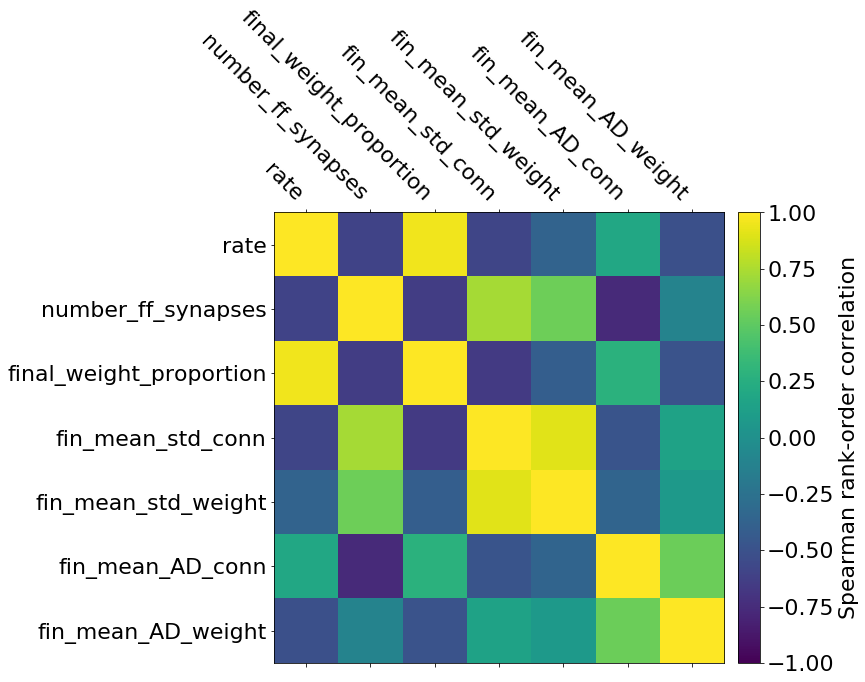

In [27]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation_with_poi_gi_case_1.correlation[0:7, 0:7], vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(interesting_names_2.size))
ax1.set_xticklabels(interesting_names_2, rotation='-45', ha='right')
ax1.set_yticks(range(interesting_names_2.size))
ax1.set_yticklabels(interesting_names_2, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation")
plt.tight_layout(.3)
f.savefig('result_matrix_correlations.png')

In [38]:
print set_of_poi.shape
print parameters_of_interest
print results_with_poi.shape
print
print results.dtype.names
print
print zip(np.arange(len(interesting_names)), interesting_names)

(478L, 5L)
['case' 'b' 'gaussian_input' 't_minus' 'p_elim_dep']
(478L, 16L)

('rate', 'number_ff_synapses', 'final_weight_proportion', 'init_mean_std', 'fin_mean_std_conn_shuf', 'fin_mean_std_conn', 'wsr_sigma_fin_conn_fin_conn_shuffle', 'fin_mean_std_weight_shuf', 'fin_mean_std_weight', 'wsr_sigma_fin_weight_fin_weight_shuffle', 'init_mean_AD', 'fin_mean_AD_conn_shuf', 'fin_mean_AD_conn', 'wsr_AD_fin_conn_fin_conn_shuffle', 'fin_mean_AD_weight_shuf', 'fin_mean_AD_weight', 'wsr_AD_fin_weight_fin_weight_shuffle')

[(0, 'rate'), (1, 'number_ff_synapses'), (2, 'final_weight_proportion'), (3, 'fin_mean_std_conn_shuf'), (4, 'fin_mean_std_conn'), (5, 'fin_mean_std_weight_shuf'), (6, 'fin_mean_std_weight'), (7, 'fin_mean_AD_conn_shuf'), (8, 'fin_mean_AD_conn'), (9, 'fin_mean_AD_weight_shuf'), (10, 'fin_mean_AD_weight')]


# B vs. $\tau_{minus}$

For this, we need to lock the other parameters. For starters, Gaussian input = 1 (Sim confirmed), case = 1, p_elim_dep = 0.0245

In [29]:
locked_gi = 1
locked_case = 1
locked_ped = 0.0245

### Construct the matrix to be displayed 

It has a height of B.size and a width of tau_minus.size

In [60]:
b_vs_tminus_std_weight_case_1 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_rates_case_1 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_weight_case_1 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_weight_case_1_gi_0 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_std_weight_case_1_gi_0 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_conn_case_1 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_std_conn_case_1 = np.ones((bs.size, tau_minuss.size)) * np.nan

b_vs_tminus_std_weight_case_2 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_rates_case_2 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_weight_case_2 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_weight_case_2_gi_0 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_std_weight_case_2_gi_0 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_conn_case_2 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_std_conn_case_2 = np.ones((bs.size, tau_minuss.size)) * np.nan

b_vs_tminus_std_weight_case_3 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_rates_case_3 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_weight_case_3 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_weight_case_3_gi_0 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_std_weight_case_3_gi_0 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_ad_conn_case_3 = np.ones((bs.size, tau_minuss.size)) * np.nan
b_vs_tminus_std_conn_case_3 = np.ones((bs.size, tau_minuss.size)) * np.nan

### We now loop over all the cells in the matrix and fill in its value from the database


In [61]:
# print "exploring effect of B vs. tau_minus on", results.dtype.names[0], results.dtype.names[8], results.dtype.names[15]
CASE_1 = 1
CASE_2 = 2
CASE_3 = 3
for index, value in np.ndenumerate(b_vs_tminus_rates_case_1):
    b_index, t_index = index
    
    
    logical_filter = np.logical_and(
            np.logical_and(results_with_poi[:,-1]==locked_ped, results_with_poi[:,-3]==locked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_1, 
                           np.logical_and(results_with_poi[:,-2]==tau_minuss[t_index], results_with_poi[:,-4]==bs[b_index])))
    b_vs_tminus_rates_case_1[b_index, t_index] = results_with_poi[logical_filter].ravel()[0]
    b_vs_tminus_std_weight_case_1[b_index, t_index] = results_with_poi[logical_filter].ravel()[6]
    b_vs_tminus_ad_weight_case_1[b_index, t_index] = results_with_poi[logical_filter].ravel()[10]
    b_vs_tminus_std_conn_case_1[b_index, t_index] = results_with_poi[logical_filter].ravel()[4]
    b_vs_tminus_ad_conn_case_1[b_index, t_index] = results_with_poi[logical_filter].ravel()[8]
    
    
    unlocked_gi = 0
    logical_filter_gi_0 = np.logical_and(
            np.logical_and(results_with_poi[:,-1]==locked_ped, results_with_poi[:,-3]==unlocked_gi),
            np.logical_and(results_with_poi[:,-5]==locked_case, 
                           np.logical_and(results_with_poi[:,-2]==tau_minuss[t_index], results_with_poi[:,-4]==bs[b_index])))
    b_vs_tminus_ad_weight_case_1_gi_0[b_index, t_index] = results_with_poi[logical_filter_gi_0].ravel()[10]
    b_vs_tminus_std_weight_case_1_gi_0[b_index, t_index] = results_with_poi[logical_filter_gi_0].ravel()[6]
    
    case_based_filter = np.logical_and(
            np.logical_and(results_with_poi[:,-1]==locked_ped, results_with_poi[:,-3]==locked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_2, 
                           np.logical_and(results_with_poi[:,-2]==tau_minuss[t_index], results_with_poi[:,-4]==bs[b_index])))
    
    b_vs_tminus_rates_case_2[b_index, t_index] = results_with_poi[case_based_filter].ravel()[0]
    b_vs_tminus_std_weight_case_2[b_index, t_index] = results_with_poi[case_based_filter].ravel()[6]
    b_vs_tminus_ad_weight_case_2[b_index, t_index] = results_with_poi[case_based_filter].ravel()[10]
    
    b_vs_tminus_std_conn_case_2[b_index, t_index] = results_with_poi[case_based_filter].ravel()[4]
    b_vs_tminus_ad_conn_case_2[b_index, t_index] = results_with_poi[case_based_filter].ravel()[8]
    
    case_based_filter = np.logical_and(
            np.logical_and(results_with_poi[:,-1]==locked_ped, results_with_poi[:,-3]==locked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_3, 
                           np.logical_and(results_with_poi[:,-2]==tau_minuss[t_index], results_with_poi[:,-4]==bs[b_index])))
    
    b_vs_tminus_rates_case_3[b_index, t_index] = results_with_poi[case_based_filter].ravel()[0]
    b_vs_tminus_std_weight_case_3[b_index, t_index] = results_with_poi[case_based_filter].ravel()[6]
    b_vs_tminus_ad_weight_case_3[b_index, t_index] = results_with_poi[case_based_filter].ravel()[10]
    
    b_vs_tminus_std_conn_case_3[b_index, t_index] = results_with_poi[case_based_filter].ravel()[4]
    b_vs_tminus_ad_conn_case_3[b_index, t_index] = results_with_poi[case_based_filter].ravel()[8]
    
    

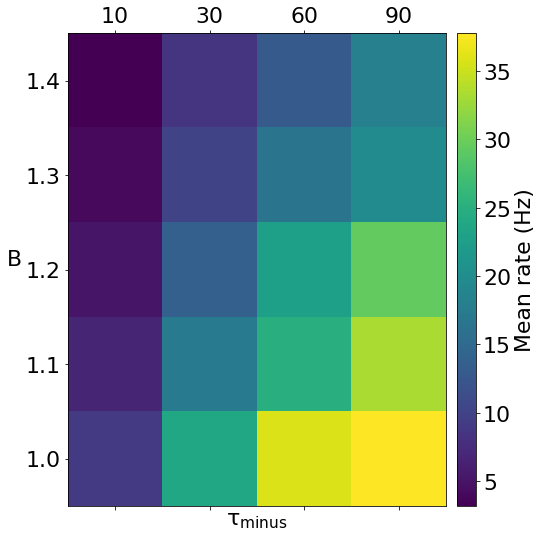

In [62]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,13))
i = ax1.matshow(b_vs_tminus_rates_case_1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_xlabel(r"$\mathrm{\tau_{minus}}$")
ax1.set_ylabel("B  ", rotation=0)
ax1.set_xticks(range(tau_minuss.size))
ax1.set_xticklabels(tau_minuss, ha='center')
ax1.set_yticks(range(bs.size))
ax1.set_yticklabels(bs, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean rate (Hz)")
plt.tight_layout()
f.savefig('b_vs_t_minus_rates_locked_case_1_gi_0_ped_default.png')

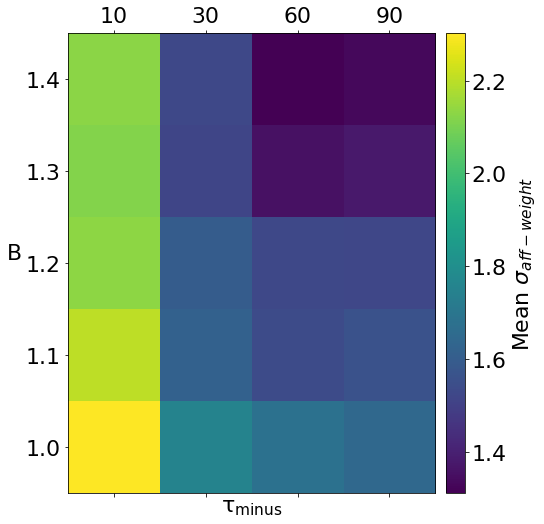

In [63]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,13))
i = ax1.matshow(b_vs_tminus_std_weight_case_1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_xlabel(r"$\mathrm{\tau_{minus}}$")
ax1.set_ylabel("B  ", rotation=0)
ax1.set_xticks(range(tau_minuss.size))
ax1.set_xticklabels(tau_minuss, ha='center')
ax1.set_yticks(range(bs.size))
ax1.set_yticklabels(bs, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-weight}$")
plt.tight_layout()
f.savefig('b_vs_t_minus_std_weight_locked_case_1_gi_0_ped_default.png')

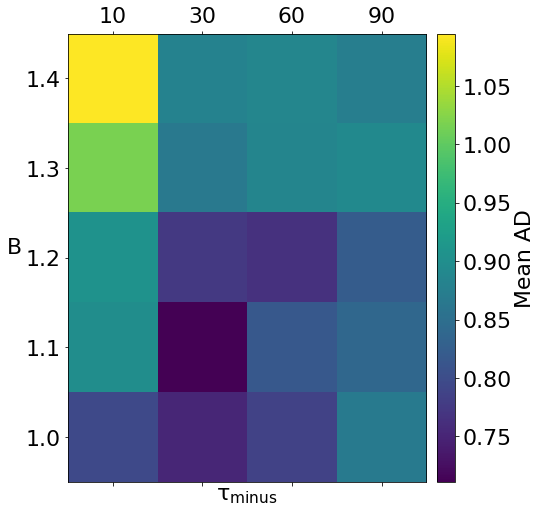

In [64]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,13))
i = ax1.matshow(b_vs_tminus_ad_weight_case_1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_xlabel(r"$\mathrm{\tau_{minus}}$")
ax1.set_ylabel("B  ", rotation=0)
ax1.set_xticks(range(tau_minuss.size))
ax1.set_xticklabels(tau_minuss, ha='center')
ax1.set_yticks(range(bs.size))
ax1.set_yticklabels(bs, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean AD")
plt.tight_layout()
f.savefig('b_vs_t_minus_ad_weight_locked_case_1_gi_0_ped_default.png')

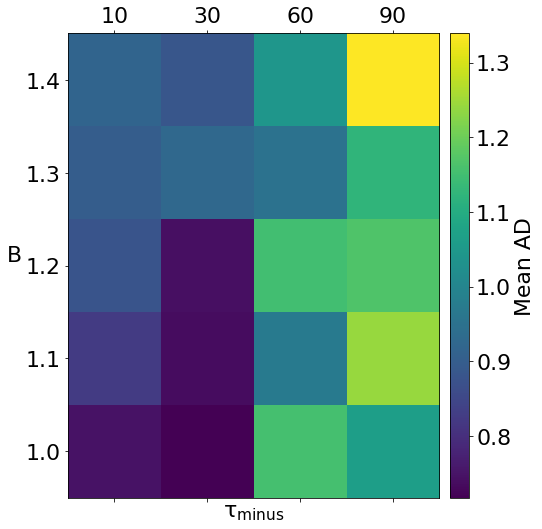

In [65]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,13))
i = ax1.matshow(b_vs_tminus_ad_weight_case_1_gi_0, vmax = np.max([b_vs_tminus_ad_weight_case_1, b_vs_tminus_ad_weight_case_1_gi_0]))
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_xlabel(r"$\mathrm{\tau_{minus}}$")
ax1.set_ylabel("B  ", rotation=0)
ax1.set_xticks(range(tau_minuss.size))
ax1.set_xticklabels(tau_minuss, ha='center')
ax1.set_yticks(range(bs.size))
ax1.set_yticklabels(bs, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean AD")
plt.tight_layout()
f.savefig('b_vs_t_minus_ad_weight_locked_case_1_gi_1_ped_default.png')

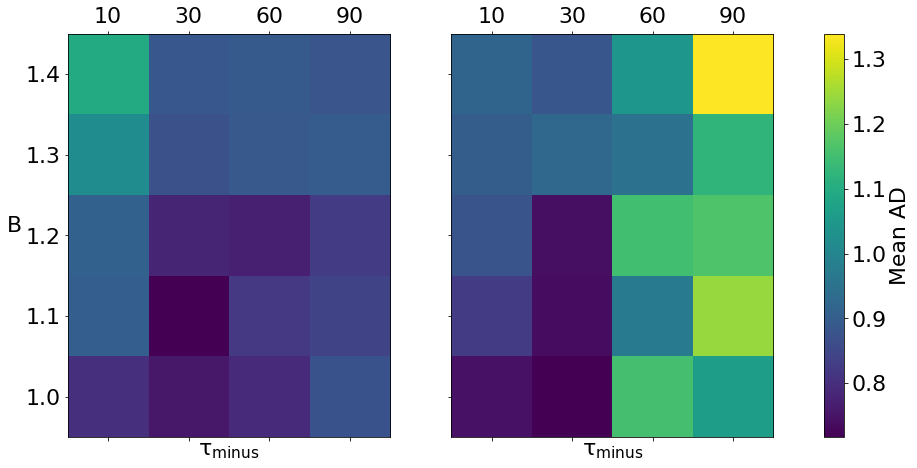

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

i = axes[0].matshow(b_vs_tminus_ad_weight_case_1, vmax = np.max([b_vs_tminus_ad_weight_case_1, b_vs_tminus_ad_weight_case_1_gi_0]))
i2 = axes[1].matshow(b_vs_tminus_ad_weight_case_1_gi_0, vmax = np.max([b_vs_tminus_ad_weight_case_1, b_vs_tminus_ad_weight_case_1_gi_0]))

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{minus}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[1].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean AD")
fig.savefig('b_vs_t_minus_ad_weight_locked_case_1_gi_1_vs_gi_0.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

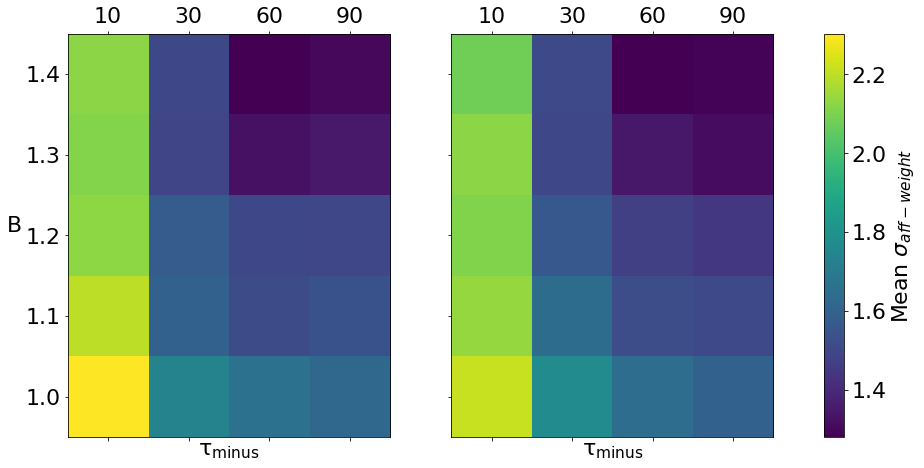

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

i = axes[0].matshow(b_vs_tminus_std_weight_case_1, vmax = np.max([b_vs_tminus_std_weight_case_1, b_vs_tminus_std_weight_case_1_gi_0]))
i2 = axes[1].matshow(b_vs_tminus_std_weight_case_1_gi_0, vmax = np.max([b_vs_tminus_std_weight_case_1, b_vs_tminus_std_weight_case_1_gi_0]))

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{minus}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[1].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)

plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean $\sigma_{aff-weight}$")

# plt.suptitle("Final mean AD \n\n\n\n")

fig.savefig('b_vs_t_minus_std_weight_locked_case_1_gi_1_vs_gi_0.png')
plt.show()

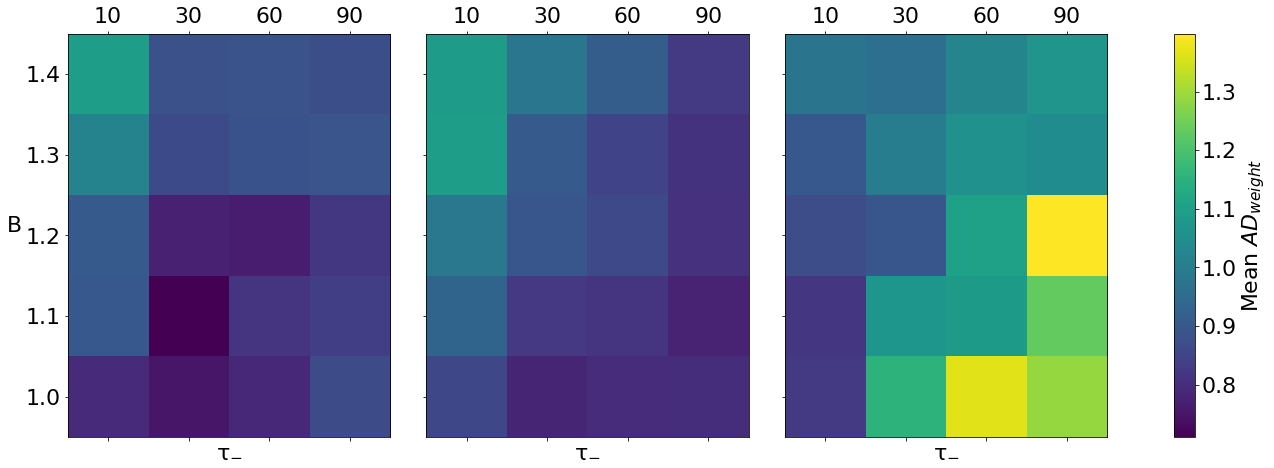

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_tminus_ad_weight_case_1, b_vs_tminus_ad_weight_case_2, b_vs_tminus_ad_weight_case_3])
minimus = np.min([b_vs_tminus_ad_weight_case_1, b_vs_tminus_ad_weight_case_2, b_vs_tminus_ad_weight_case_3])
i = axes[0].matshow(b_vs_tminus_ad_weight_case_1,vmin=minimus,  vmax = maximus)
i2 = axes[1].matshow(b_vs_tminus_ad_weight_case_2, vmin=minimus, vmax = maximus)
i3 = axes[2].matshow(b_vs_tminus_ad_weight_case_3, vmin=minimus, vmax = maximus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{-}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[1].set_yticklabels("")
axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean $AD_{weight}$")
fig.savefig('b_vs_t_minus_ad_weight_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

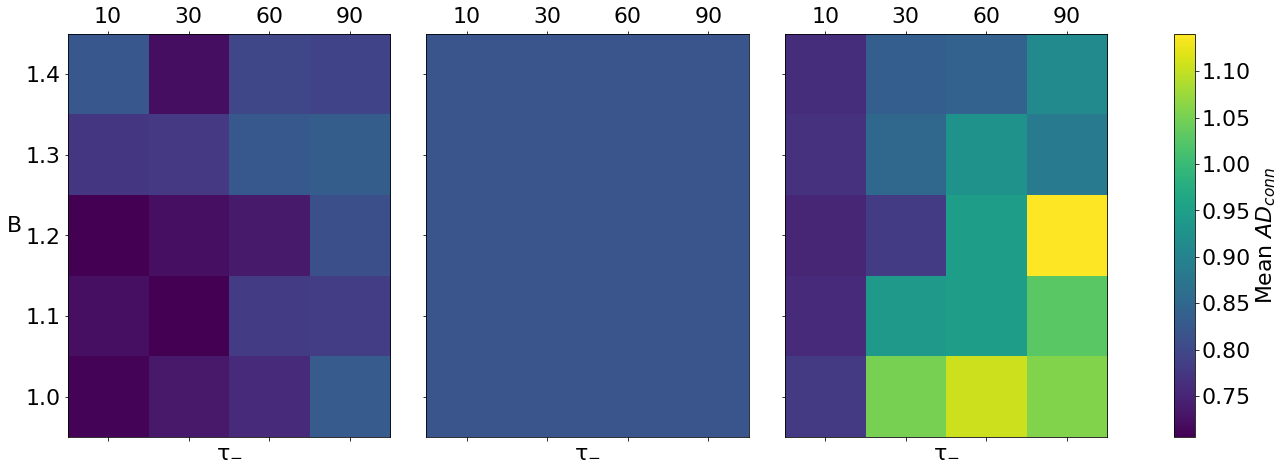

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_tminus_ad_conn_case_1, b_vs_tminus_ad_conn_case_2, b_vs_tminus_ad_conn_case_3])
minimus = np.min([b_vs_tminus_ad_conn_case_1, b_vs_tminus_ad_conn_case_2, b_vs_tminus_ad_conn_case_3])
i = axes[0].matshow(b_vs_tminus_ad_conn_case_1,vmin=minimus, vmax = maximus)
i2 = axes[1].matshow(b_vs_tminus_ad_conn_case_2, vmin=minimus, vmax = maximus)
i3 = axes[2].matshow(b_vs_tminus_ad_conn_case_3, vmin=minimus, vmax = maximus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{-}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[1].set_yticklabels("")
axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean $AD_{conn}$")
fig.savefig('b_vs_t_minus_ad_conn_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

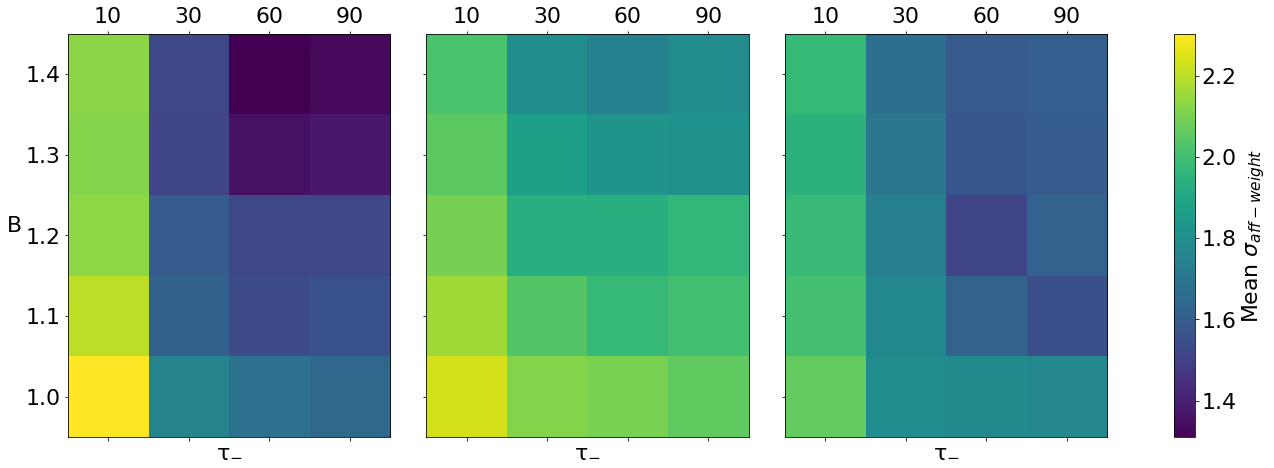

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_tminus_std_weight_case_1, b_vs_tminus_std_weight_case_2, b_vs_tminus_std_weight_case_3])
minumus = np.min([b_vs_tminus_std_weight_case_1, b_vs_tminus_std_weight_case_2, b_vs_tminus_std_weight_case_3])
i = axes[0].matshow(b_vs_tminus_std_weight_case_1, vmax = maximus, vmin=minumus)
i2 = axes[1].matshow(b_vs_tminus_std_weight_case_2, vmax = maximus, vmin=minumus)
i3 = axes[2].matshow(b_vs_tminus_std_weight_case_3, vmax = maximus, vmin=minumus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{-}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[1].set_yticklabels("")
axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i3, ax=axes.ravel().tolist())
cbar.set_label("Mean $\sigma_{aff-weight}$")
fig.savefig('b_vs_t_minus_std_weight_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

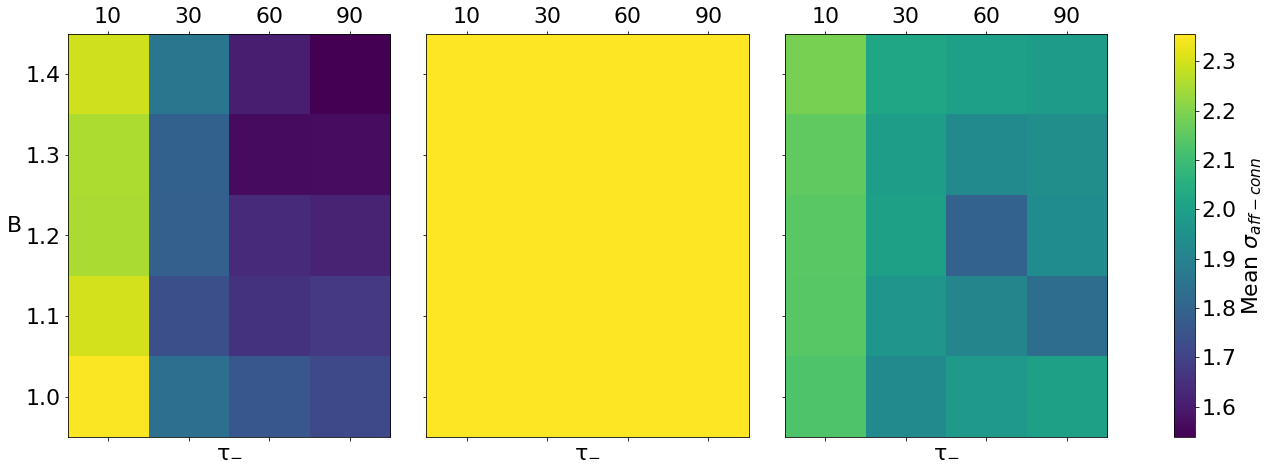

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_tminus_std_conn_case_1, b_vs_tminus_std_conn_case_2, b_vs_tminus_std_conn_case_3])
minumus = np.min([b_vs_tminus_std_conn_case_1, b_vs_tminus_std_conn_case_2, b_vs_tminus_std_conn_case_3])
i = axes[0].matshow(b_vs_tminus_std_conn_case_1, vmax = maximus, vmin=minumus)
i2 = axes[1].matshow(b_vs_tminus_std_conn_case_2, vmax = maximus, vmin=minumus)
i3 = axes[2].matshow(b_vs_tminus_std_conn_case_3, vmax = maximus, vmin=minumus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{-}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[1].set_yticklabels("")
axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i3, ax=axes.ravel().tolist())
cbar.set_label("Mean $\sigma_{aff-conn}$")
fig.savefig('b_vs_t_minus_std_conn_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

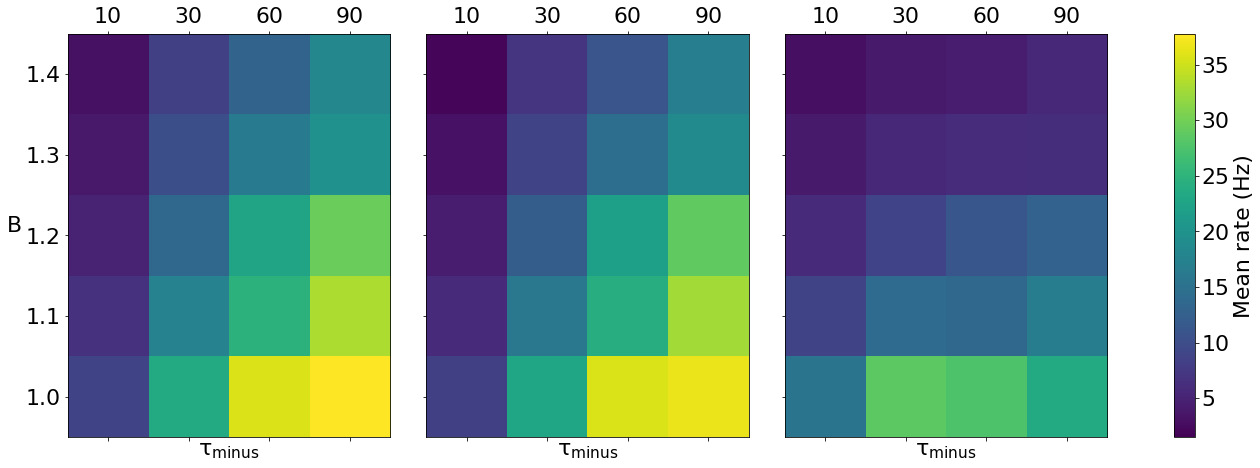

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_tminus_rates_case_1, b_vs_tminus_rates_case_2, b_vs_tminus_rates_case_3])
minimus = np.min([b_vs_tminus_rates_case_1, b_vs_tminus_rates_case_2, b_vs_tminus_rates_case_3])
i = axes[0].matshow(b_vs_tminus_rates_case_1, vmax = maximus, vmin=minumus)
i2 = axes[1].matshow(b_vs_tminus_rates_case_2, vmax = maximus, vmin=minumus)
i3 = axes[2].matshow(b_vs_tminus_rates_case_3, vmax = maximus, vmin=minumus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel(r"$\mathrm{\tau_{minus}}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(tau_minuss.size))
    a.set_xticklabels(tau_minuss, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[1].set_yticklabels("")
axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i3, ax=axes.ravel().tolist())
cbar.set_label("Mean rate (Hz)")
fig.savefig('b_vs_t_minus_rates_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

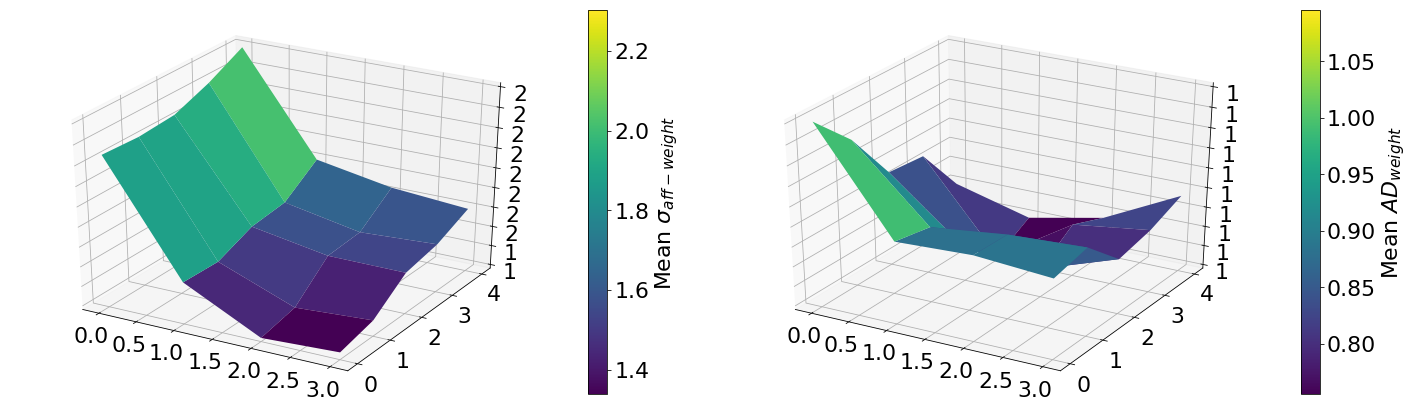

In [230]:
from matplotlib import cm
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(20, 6), dpi=800)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

maximus = np.max([b_vs_tminus_std_weight_case_1, b_vs_tminus_ad_weight_case_1])

# Plot the surface.
X, Y = np.meshgrid(np.arange(b_vs_tminus_std_weight_case_1.shape[1]), np.arange(b_vs_tminus_std_weight_case_1.shape[0]))


surf = ax.plot_surface(X, Y, b_vs_tminus_std_weight_case_1, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max([b_vs_tminus_std_weight_case_1]))

# ax.set_title("Mean $\sigma_{aff\_weight} \n$")


cbar = fig.colorbar(surf)
cbar.set_label("Mean $\sigma_{aff-weight}$")
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(b_vs_tminus_std_weight_case_1.shape[1]), np.arange(b_vs_tminus_std_weight_case_1.shape[0]))

surf2 = ax2.plot_surface(X, Y, b_vs_tminus_ad_weight_case_1, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max([b_vs_tminus_ad_weight_case_1]))
# ax2.set_title("Mean AD \n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(surf2, cax=cax)
# cbar.set_label("Spearman rank-order correlation", fontsize=14)

plt.tight_layout()
cbar = fig.colorbar(surf2)
cbar.set_label("Mean $AD_{weight}$")
fig.savefig("case_1_ad_std_surfaces.png")


# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=10)

# $B$ vs. $p_{elim\_dep}$

For this, we need to lock the other parameters. For all following sims, analysis will be performed using GI = 1, except otherwise states. Locking tau_minus

In [19]:
locked_gi = 1
# Locking tau_minus based on best previous results
locked_tminus = 90

In [20]:
b_vs_p_std_weight_case_1 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_rates_case_1 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_ad_weight_case_1 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_ad_weight_case_1_gi_0 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_std_weight_case_1_gi_0 = np.ones((bs.size, p_elim_deps.size)) * np.nan

b_vs_p_std_weight_case_2 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_rates_case_2 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_ad_weight_case_2 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_ad_weight_case_2_gi_0 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_std_weight_case_2_gi_0 = np.ones((bs.size, p_elim_deps.size)) * np.nan

b_vs_p_std_weight_case_3 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_rates_case_3 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_ad_weight_case_3 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_ad_weight_case_3_gi_0 = np.ones((bs.size, p_elim_deps.size)) * np.nan
b_vs_p_std_weight_case_3_gi_0 = np.ones((bs.size, p_elim_deps.size)) * np.nan

In [23]:
# print "exploring effect of B vs. tau_minus on", results.dtype.names[0], results.dtype.names[8], results.dtype.names[15]
CASE_1 = 1
CASE_2 = 2
CASE_3 = 3
for index, value in np.ndenumerate(b_vs_p_rates_case_1):
    b_index, p_index = index
    
    
    logical_filter = np.logical_and(
            np.logical_and(results_with_poi[:,-2]==locked_tminus, results_with_poi[:,-3]==locked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_1, 
                           np.logical_and(results_with_poi[:,-1]==p_elim_deps[p_index], results_with_poi[:,-4]==bs[b_index])))
    b_vs_p_rates_case_1[b_index, p_index] = results_with_poi[logical_filter].ravel()[0]
    b_vs_p_std_weight_case_1[b_index, p_index] = results_with_poi[logical_filter].ravel()[6]
    b_vs_p_ad_weight_case_1[b_index, p_index] = results_with_poi[logical_filter].ravel()[10]
    
    
    unlocked_gi = 0
    logical_filter_gi_0 = np.logical_and(
            np.logical_and(results_with_poi[:,-2]==locked_tminus, results_with_poi[:,-3]==unlocked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_1, 
                           np.logical_and(results_with_poi[:,-1]==p_elim_deps[p_index], results_with_poi[:,-4]==bs[b_index])))
    b_vs_p_ad_weight_case_1_gi_0[b_index, p_index] = results_with_poi[logical_filter_gi_0].ravel()[10]
    b_vs_p_std_weight_case_1_gi_0[b_index, p_index] = results_with_poi[logical_filter_gi_0].ravel()[6]
    
    case_based_filter = np.logical_and(
            np.logical_and(results_with_poi[:,-2]==locked_tminus, results_with_poi[:,-3]==locked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_2, 
                           np.logical_and(results_with_poi[:,-1]==p_elim_deps[p_index], results_with_poi[:,-4]==bs[b_index])))
    
    b_vs_p_rates_case_2[b_index, p_index] = results_with_poi[case_based_filter].ravel()[0]
    b_vs_p_std_weight_case_2[b_index, p_index] = results_with_poi[case_based_filter].ravel()[6]
    b_vs_p_ad_weight_case_2[b_index, p_index] = results_with_poi[case_based_filter].ravel()[10]
    
    case_based_filter = np.logical_and(
            np.logical_and(results_with_poi[:,-2]==locked_tminus, results_with_poi[:,-3]==locked_gi),
            np.logical_and(results_with_poi[:,-5]==CASE_3, 
                           np.logical_and(results_with_poi[:,-1]==p_elim_deps[p_index], results_with_poi[:,-4]==bs[b_index])))
    
    b_vs_p_rates_case_3[b_index, p_index] = results_with_poi[case_based_filter].ravel()[0]
    b_vs_p_std_weight_case_3[b_index, p_index] = results_with_poi[case_based_filter].ravel()[6]
    b_vs_p_ad_weight_case_3[b_index, p_index] = results_with_poi[case_based_filter].ravel()[10]
    
    

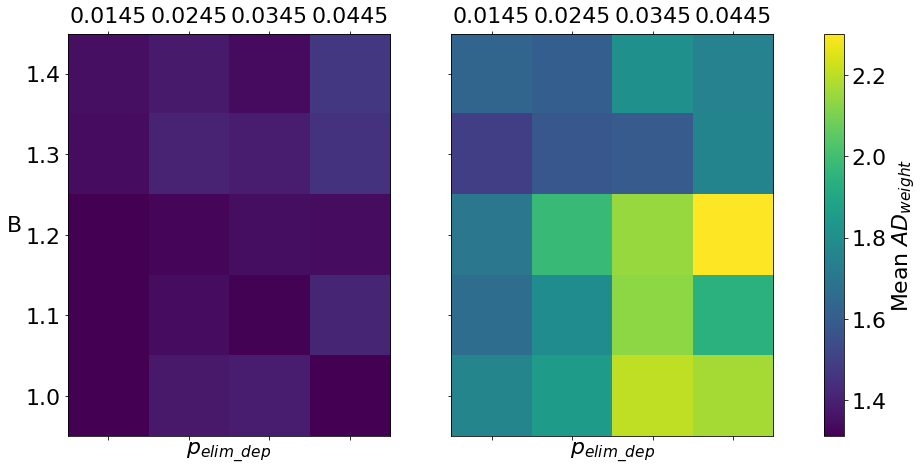

In [229]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_p_ad_weight_case_1, b_vs_p_ad_weight_case_3])
minimus = np.min([b_vs_p_ad_weight_case_1, b_vs_p_ad_weight_case_3])
i = axes[0].matshow(b_vs_p_ad_weight_case_1, vmax = maximus, vmin=minumus-.5)
# i2 = axes[1].matshow(b_vs_p_ad_weight_case_2, vmax = maximus, vmin=minumus-.5)
i3 = axes[1].matshow(b_vs_p_ad_weight_case_3, vmax = maximus, vmin=minumus-.5)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel("$p_{elim\_dep}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(p_elim_deps.size))
    a.set_xticklabels(p_elim_deps, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
# axes[2].set_ylabel("")
axes[1].set_yticklabels("")
# axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean $AD_{weight}$")
fig.savefig('b_vs_p_elim_dep_ad_weight_locked_case_1_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

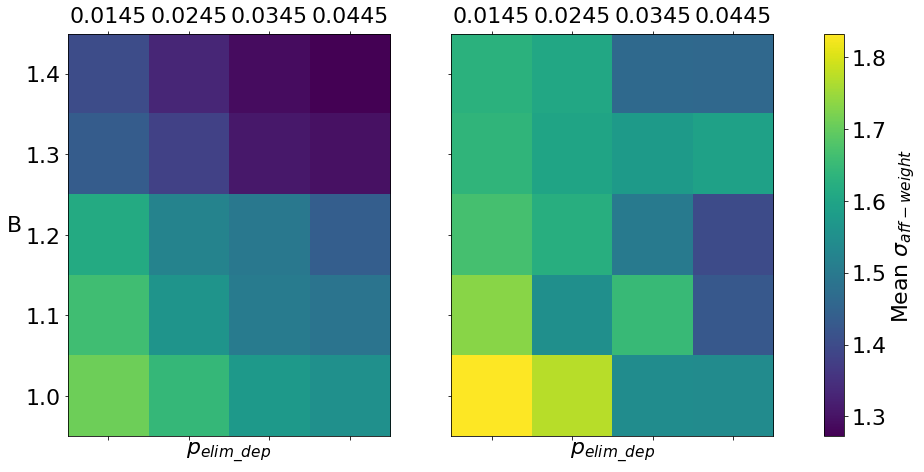

In [231]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_p_std_weight_case_1, b_vs_p_std_weight_case_3])
minimus = np.min([b_vs_p_std_weight_case_1, b_vs_p_std_weight_case_3])
i = axes[0].matshow(b_vs_p_std_weight_case_1, vmax = maximus, vmin=minimus)
# i2 = axes[1].matshow(b_vs_p_std_weight_case_2, vmax = maximus)
i3 = axes[1].matshow(b_vs_p_std_weight_case_3, vmax = maximus, vmin=minimus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel("$p_{elim\_dep}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(p_elim_deps.size))
    a.set_xticklabels(p_elim_deps, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
# axes[2].set_ylabel("")
axes[1].set_yticklabels("")
# axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i3, ax=axes.ravel().tolist())
cbar.set_label("Mean $\sigma_{aff-weight}$")
fig.savefig('b_vs_p_elim_dep_std_weight_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

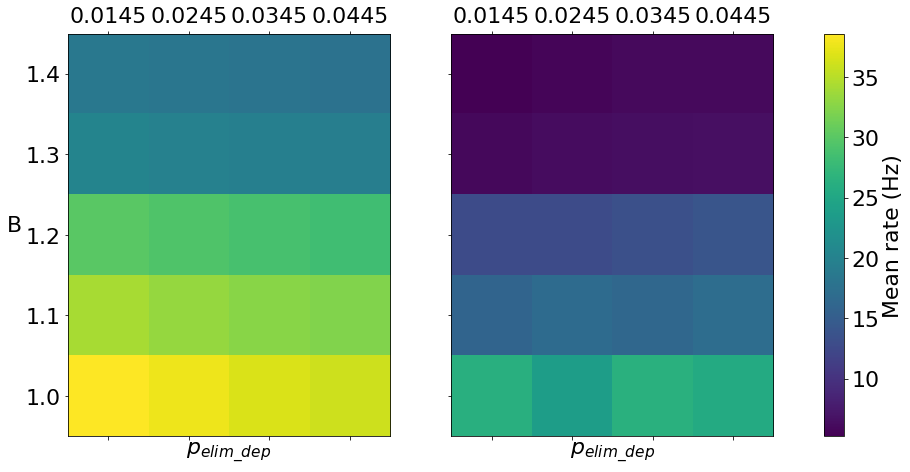

In [220]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
maximus = np.max([b_vs_p_rates_case_1, b_vs_p_rates_case_3])
minimus = np.min([b_vs_p_rates_case_1, b_vs_p_rates_case_3])
i = axes[0].matshow(b_vs_p_rates_case_1, vmax = maximus, vmin=minimus)
# i2 = axes[1].matshow(b_vs_p_rates_case_2, vmax = maximus)
i3 = axes[1].matshow(b_vs_p_rates_case_3, vmax = maximus, vmin=minimus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel("$p_{elim\_dep}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(p_elim_deps.size))
    a.set_xticklabels(p_elim_deps, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
# axes[2].set_ylabel("")
axes[1].set_yticklabels("")
# axes[2].set_yticklabels("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i3, ax=axes.ravel().tolist())
cbar.set_label("Mean rate (Hz)")
fig.savefig('b_vs_p_elim_dep_rates_locked_case_1_2_3.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

# Sanity check. Compare column for $p_{elim\_dep}=0.0245$ with previous results (when it was locked to that value) where tau_minus = 90 

In [163]:
assert np.all(b_vs_tminus_std_weight_case_1[:, -1] == b_vs_p_std_weight_case_1[:,1])
assert np.all(b_vs_tminus_std_weight_case_2[:, -1] == b_vs_p_std_weight_case_2[:,1])
assert np.all(b_vs_tminus_std_weight_case_3[:, -1] == b_vs_p_std_weight_case_3[:,1])

assert np.all(b_vs_tminus_ad_weight_case_1[:, -1] == b_vs_p_ad_weight_case_1[:,1])
assert np.all(b_vs_tminus_ad_weight_case_2[:, -1] == b_vs_p_ad_weight_case_2[:,1])
assert np.all(b_vs_tminus_ad_weight_case_3[:, -1] == b_vs_p_ad_weight_case_3[:,1])

# Do a lower / higher p_elim_dep help with pointy input?

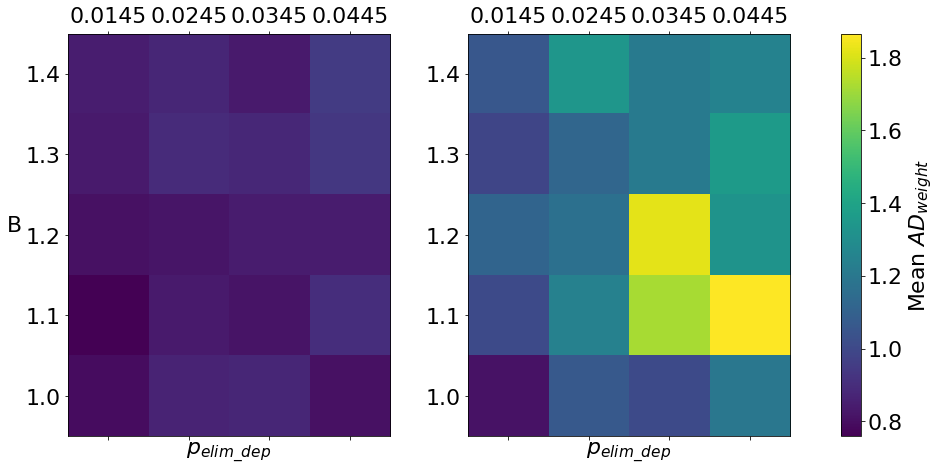

In [232]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

maximus = np.max([b_vs_p_ad_weight_case_1, b_vs_p_ad_weight_case_1_gi_0])
minimus = np.min([b_vs_p_ad_weight_case_1, b_vs_p_ad_weight_case_1_gi_0])

i = axes[0].matshow(b_vs_p_ad_weight_case_1, vmax = maximus, vmin=minimus)
i2 = axes[1].matshow(b_vs_p_ad_weight_case_1_gi_0, vmax = maximus, vmin=minimus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel("$p_{elim\_dep}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(p_elim_deps.size))
    a.set_xticklabels(p_elim_deps, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean $AD_{weight}$")
fig.savefig('b_vs_p_elim_dep_ad_weight_locked_case_1_gi_1_vs_gi_0.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()

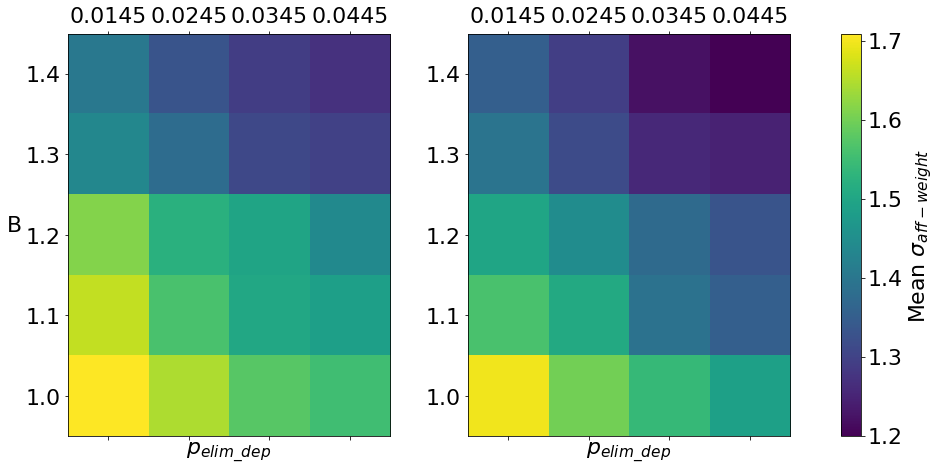

In [233]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7), dpi=600)
# for ax in axes.flat:
#     im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

maximus = np.max([b_vs_p_std_weight_case_1, b_vs_p_std_weight_case_1_gi_0])
minimus = np.min([b_vs_p_std_weight_case_1, b_vs_p_std_weight_case_1_gi_0])

i = axes[0].matshow(b_vs_p_std_weight_case_1, vmax = maximus, vmin=minimus)
i2 = axes[1].matshow(b_vs_p_std_weight_case_1_gi_0, vmax = maximus, vmin=minimus)

for a in axes:
    a.grid(visible=False)
    # ax1.set_title("Correlation matrix", fontsize=16)
    a.set_xlabel("$p_{elim\_dep}$")
    a.set_ylabel("B  ", rotation=0)
    a.set_xticks(range(p_elim_deps.size))
    a.set_xticklabels(p_elim_deps, ha='center')
    a.set_yticks(range(bs.size))
    a.set_yticklabels(bs, ha='right')
axes[1].set_ylabel("")
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)


plt.tight_layout()
cbar = fig.colorbar(i2, ax=axes.ravel().tolist())
cbar.set_label("Mean $\sigma_{aff-weight}$")
fig.savefig('b_vs_p_elim_dep_std_weight_locked_case_1_gi_1_vs_gi_0.png')
# plt.suptitle("Final mean AD \n\n\n\n")

plt.show()